## 1. Data Acquisition

In [18]:
! pip install pandas
! pip install mysql-connector-python
! pip install pip install tensorflow
! pip install flask

In [25]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import joblib

In [26]:
df = pd.read_excel('Sales Dataset.xlsx')

In [27]:
df.head()

,Opportunity ID,Technology\nPrimary,City,B2B Sales Medium,Sales Velocity,Opportunity Status,Sales Stage Iterations,Opportunity Size (USD),Client Revenue Sizing,Client Employee Sizing,Business from Client Last Year,Compete Intel,Opportunity Sizing
0,N00000001,ERP Implementation,Bengaluru,Marketing,76,Won,13,0,More than 1M,More than 25K,0 (No business),Unknown,10K or less
1,N00000002,ERP Implementation,Delhi,Enterprise Sellers,63,Loss,2,0,250K to 500K,More than 25K,0 (No business),Unknown,10K or less
2,N00000003,Technical Business Solutions,Delhi,Enterprise Sellers,24,Won,7,7750,100K or less,1K or less,0 (No business),Unknown,10K or less
3,N00000004,Technical Business Solutions,Mumbai,Enterprise Sellers,16,Loss,5,0,100K or less,1K or less,0 (No business),Known,10K or less
4,N00000005,ERP Implementation,Delhi,Enterprise Sellers,69,Loss,11,32886,100K or less,1K or less,0 (No business),Unknown,30K to 40K


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78025 entries, 0 to 78024
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Opportunity ID                  78025 non-null  object
 1   Technology
Primary              78025 non-null  object
 2   City                            78025 non-null  object
 3   B2B Sales Medium                78025 non-null  object
 4   Sales Velocity                  78025 non-null  int64 
 5   Opportunity Status              78025 non-null  object
 6   Sales Stage Iterations          78025 non-null  int64 
 7   Opportunity Size (USD)          78025 non-null  int64 
 8   Client Revenue Sizing           78025 non-null  object
 9   Client Employee Sizing          78025 non-null  object
 10  Business from Client Last Year  78025 non-null  object
 11  Compete Intel                   68768 non-null  object
 12  Opportunity Sizing              78025 non-null

## 2. Data Pre-processing

### 2.1 Checking unique values 

In [29]:
# Unique Values

for column in df.columns:
    unique_values = df[column].unique()
    num_unique_values = len(unique_values)
    print(f"Unique values in '{column}':\n{unique_values}")
    print(f"Number of unique values in '{column}': {num_unique_values}\n")


Unique values in 'Opportunity ID':
['N00000001' 'N00000002' 'N00000003' ... 'N00078023' 'N00078024'
 'N00078025']
Number of unique values in 'Opportunity ID': 78025

Unique values in 'Technology
Primary':
['ERP Implementation' 'Technical Business Solutions'
 'Legacy Modernization' 'Analytics']
Number of unique values in 'Technology
Primary': 4

Unique values in 'City':
['Bengaluru' 'Delhi' 'Mumbai' 'Pune' 'Chennai' 'Kolkata' 'Hyderabad']
Number of unique values in 'City': 7

Unique values in 'B2B Sales Medium':
['Marketing' 'Enterprise Sellers' 'Partners' 'Tele Sales' 'Online Leads']
Number of unique values in 'B2B Sales Medium': 5

Unique values in 'Sales Velocity':
[ 76  63  24  16  69  89 111  82  68  18  87  35  81  79  83  65  91  62
  73  86  60  72  44   1  49 138  77  45  85  54  84  78  74  64  88  90
   7  70  37  28 101  80  75  95  26  38  47  93 135  56  67  57  59  29
  43   5  41 120  66 128  58  48  17  23  25  53  36  27  20  33 102 129
  51 148  30  92 115 137   9  46

In [30]:
# Replace None values with 'None'
df['Compete Intel'].fillna('None', inplace=True)

# Count of 'Unknown', 'Known', and 'None' values in 'Compete Intel' column
counts = df['Compete Intel'].value_counts()

# Create a pie chart using Plotly
fig = px.pie(names=counts.index, values=counts.values, 
             labels=counts.index, title='Distribution of Compete Intel')

# Show the plot
fig.show()

**Known** and **None** are almost the same propotion and hence, play a significant role 

### 2.2 STANDARDIZING COLUMN NAMES

In [31]:
# Standardize column names
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.rename(columns={'technology\nprimary': 'technology_primary'}, inplace=True)
df.rename(columns={'opportunity_size_(usd)': 'opportunity_size_usd'}, inplace=True)

In [32]:
df.columns

Index(['opportunity_id', 'technology_primary', 'city', 'b2b_sales_medium',
       'sales_velocity', 'opportunity_status', 'sales_stage_iterations',
       'opportunity_size_usd', 'client_revenue_sizing',
       'client_employee_sizing', 'business_from_client_last_year',
       'compete_intel', 'opportunity_sizing'],
      dtype='object')

### 2.3 Handling Missing Values

In [33]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()

# Display the count of missing values for each column
print("Missing Values:")
print(missing_values)

# Display the percentage of missing values for each column
total_cells = df.size
total_missing = missing_values.sum()
percentage_missing = (total_missing / total_cells) * 100
print(f"\nPercentage of Missing Values: {percentage_missing:.2f}%")


Missing Values:
opportunity_id                    0
technology_primary                0
city                              0
b2b_sales_medium                  0
sales_velocity                    0
opportunity_status                0
sales_stage_iterations            0
opportunity_size_usd              0
client_revenue_sizing             0
client_employee_sizing            0
business_from_client_last_year    0
compete_intel                     0
opportunity_sizing                0
dtype: int64

Percentage of Missing Values: 0.00%


There are no **missing values** in dataset and hence this step is not needed. 

### 2.3 CATEGORICAL COLUMNS

In [34]:
# Select categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Display the list of categorical columns
print("Categorical Columns:")
print(categorical_columns)


Categorical Columns:
['opportunity_id', 'technology_primary', 'city', 'b2b_sales_medium', 'opportunity_status', 'client_revenue_sizing', 'client_employee_sizing', 'business_from_client_last_year', 'compete_intel', 'opportunity_sizing']


In [35]:
df.head()

,opportunity_id,technology_primary,city,b2b_sales_medium,sales_velocity,opportunity_status,sales_stage_iterations,opportunity_size_usd,client_revenue_sizing,client_employee_sizing,business_from_client_last_year,compete_intel,opportunity_sizing
0,N00000001,ERP Implementation,Bengaluru,Marketing,76,Won,13,0,More than 1M,More than 25K,0 (No business),Unknown,10K or less
1,N00000002,ERP Implementation,Delhi,Enterprise Sellers,63,Loss,2,0,250K to 500K,More than 25K,0 (No business),Unknown,10K or less
2,N00000003,Technical Business Solutions,Delhi,Enterprise Sellers,24,Won,7,7750,100K or less,1K or less,0 (No business),Unknown,10K or less
3,N00000004,Technical Business Solutions,Mumbai,Enterprise Sellers,16,Loss,5,0,100K or less,1K or less,0 (No business),Known,10K or less
4,N00000005,ERP Implementation,Delhi,Enterprise Sellers,69,Loss,11,32886,100K or less,1K or less,0 (No business),Unknown,30K to 40K


Convert Opportunity status to true and false categories.

In [36]:
# Encode 'opportunity_status' into a single column
df['opportunity_status'] = df['opportunity_status'].apply(lambda x: 1 if x == 'Won' else 0)


### 2.4 Duplicate Values

In [37]:
# Check for duplicate rows in the DataFrame
duplicate_rows = df[df.duplicated()]

# Print duplicate rows, if any
if not duplicate_rows.empty:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")


No duplicate rows found.


## 3. Connecting to Data Source

In [38]:
from sqlalchemy.orm import sessionmaker
from sqlalchemy.exc import IntegrityError
from models import ExecutionStatus, SalesData, Base  # Import Base from models

def create_and_insert(engine, df):
    Session = sessionmaker(bind=engine)
    session = Session()
    
    try:
        # Create tables if not exists
        Base.metadata.create_all(engine)

        # Check if script has already been executed
        if not session.query(ExecutionStatus).filter_by(script_name='InsertValuesToSaleData').first():
            # Insert data
            for _, row in df.iterrows():
                saleData_entry = SalesData(**row.to_dict())
                session.add(saleData_entry)

            # Update execution status to indicate that insert statement has been executed
            session.add(ExecutionStatus(script_name='InsertValuesToSaleData', executed=True))

            # Commit the changes
            session.commit()
            logging.info("Insert statement executed successfully")
        else:
            logging.info("Insert statement has already been executed before")
    except IntegrityError as e:
        session.rollback()
        logging.error("Error executing insert statement:", e)
    finally:
        session.close()

In [39]:
import json
import logging
from sqlalchemy import create_engine
from datetime import datetime

# Get current date and time
current_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

# Configure logging with dynamic filename
log_filename = f"{current_time}.log"
logging.basicConfig(filename=log_filename, level=logging.INFO)

try:
    # Load connection details from the config file
    with open('config.json') as f:
        config = json.load(f)['mysql']

    # Create the database URL
    db_url = f"mysql+mysqlconnector://{config['user']}:{config['password']}@{config['host']}/{config['database']}"
    
    # Create the SQLAlchemy engine
    engine = create_engine(db_url)

    # Test the connection
    with engine.connect() as connection:
        logging.info("Connected to MySQL database successfully")
        create_and_insert(engine, df)
        
except Exception as e:
    logging.error("Failed to connect to MySQL database: %s", e)

## 4. Connecting to Grafana Dashboard


In [17]:
import webbrowser

def launch_grafana_dashboard(dashboard_url):
    webbrowser.open(dashboard_url)

if __name__ == "__main__":
    
    # Load from Json
    
    # Load connection details from the config file
    with open('config.json') as f:
        grafana_config = json.load(f)['grafana']
        
    
    dashboard_url = f"{grafana_config['url']}/{grafana_config['dashboard_id']}/{grafana_config['dashboard_slug']}?orgId={grafana_config['org_id']}"
    launch_grafana_dashboard(dashboard_url)


## 5. Prediction Models

In [47]:
# Handle missing values (if any)
df.fillna(method='ffill', inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])
    
    
# Save the label encoder
joblib.dump(label_encoder, 'label_encoder.pkl')

# Define features (X) and target variable (y)
X = df.drop(columns=['opportunity_status'])  # Excluding 'Opportunity Status' as it's the target variable
y = df['opportunity_status']

0        0
1        0
2        0
3        0
4        3
        ..
78020    5
78021    4
78022    3
78023    4
78024    3
Name: opportunity_sizing, Length: 78025, dtype: int64


In [41]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)
model.save('opportunity_to_sales_model.keras')

Epoch 1/50
1561/1561 [==============================] - 1s 546us/step - loss: 159.7980 - accuracy: 0.7005 - val_loss: 0.5516 - val_accuracy: 0.7716
Epoch 2/50
1561/1561 [==============================] - 1s 453us/step - loss: 1.9527 - accuracy: 0.7483 - val_loss: 0.5388 - val_accuracy: 0.7716
Epoch 3/50
1561/1561 [==============================] - 1s 475us/step - loss: 0.9191 - accuracy: 0.7651 - val_loss: 0.5373 - val_accuracy: 0.7716
Epoch 4/50
1561/1561 [==============================] - 1s 451us/step - loss: 0.7327 - accuracy: 0.7697 - val_loss: 0.5373 - val_accuracy: 0.7716
Epoch 5/50
1561/1561 [==============================] - 1s 450us/step - loss: 0.6095 - accuracy: 0.7722 - val_loss: 0.5373 - val_accuracy: 0.7716
Epoch 6/50
1561/1561 [==============================] - 1s 448us/step - loss: 0.5827 - accuracy: 0.7730 - val_loss: 0.5374 - val_accuracy: 0.7716
Epoch 7/50
1561/1561 [==============================] - 1s 446us/step - loss: 0.5573 - accuracy: 0.7736 - val_loss: 0.5373

In [43]:

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)  # Applying a threshold of 0.5 to convert probabilities to class labels

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

488/488 [==============================] - 0s 293us/step - loss: 0.5309 - accuracy: 0.7769
Test Accuracy: 0.7768663763999939
488/488 [==============================] - 0s 244us/step
Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.87     12123
           1       0.00      0.00      0.00      3482

    accuracy                           0.78     15605
   macro avg       0.39      0.50      0.44     15605
weighted avg       0.60      0.78      0.68     15605



/Users/radhikachitkara/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/radhikachitkara/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/radhikachitkara/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('B2B_dataset.csv')

data.head()


,Product,Seller,Authority,Comp_size,Competitors,Purch_dept,Partnership,Budgt_alloc,Forml_tend,RFI,...,Source,Client,Scope,Strat_deal,Cross_sale,Up_sale,Deal_type,Needs_def,Att_t_client,Status
0,Product A,Seller 6,Mid,Mid,No,Unknown,No,Yes,No,Yes,...,Referral,Current,Clear,Very important,No,Yes,Project,Yes,Strategic account,Won
1,Product B,Seller 8,Mid,Big,No,Yes,No,Unknown,No,No,...,Referral,Current,Clear,Unimportant,No,Yes,Maintenance,Yes,Strategic account,Won
2,Product F,Seller 1,Mid,Big,No,No,Yes,No,No,No,...,Joint past,Current,Few questions,Average important,Yes,No,Project,Info gathering,Strategic account,Won
3,Product B,Seller 8,Mid,Big,No,Yes,No,No,No,No,...,Joint past,Current,Clear,Very important,No,Yes,Maintenance,Yes,Strategic account,Won
4,Product C,Seller 1,Mid,Small,Unknown,No,No,No,No,No,...,Unknown,New,Few questions,Average important,No,No,Project,No,Normal,Won


In [2]:
# Preprocessing

# Specify categorical columns
categorical_columns = ['Authority', 'Comp_size', 'Competitors', 'Purch_dept', 'Partnership', 
                       'Budgt_alloc', 'Forml_tend', 'RFI', 'RFP', 'Growth', 'Posit_statm', 
                       'Client', 'Scope', 'Strat_deal', 'Cross_sale', 'Deal_type', 'Needs_def', 
                       'Att_t_client', 'Status']

for column in categorical_columns:
    data[column] = data[column].astype('category')

# Split data into features and target variable
X = data.drop(columns=['Status'])  # Features
y = data['Status']  # Target variable


In [3]:
# Convert categorical columns to categorical data type
categorical_columns = ['Authority', 'Comp_size', 'Competitors', 'Purch_dept', 'Partnership', 
                       'Budgt_alloc', 'Forml_tend', 'RFI', 'RFP', 'Growth', 'Posit_statm', 
                       'Client', 'Scope', 'Strat_deal', 'Cross_sale', 'Deal_type', 'Needs_def', 
                       'Att_t_client', 'Status', 'Source', 'Up_sale']

for col in categorical_columns:
    data[col] = data[col].astype('category')

# Convert categorical values to numerical labels using LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Separate features (X) and target variable (y)
X = data.drop(columns=['Status'])  # Features
y = data['Status']  # Target variable


In [4]:
data_subset = data.iloc[:, 2:]

# Calculate the correlation matrix for the subset of data
correlation_matrix = data_subset.corr()

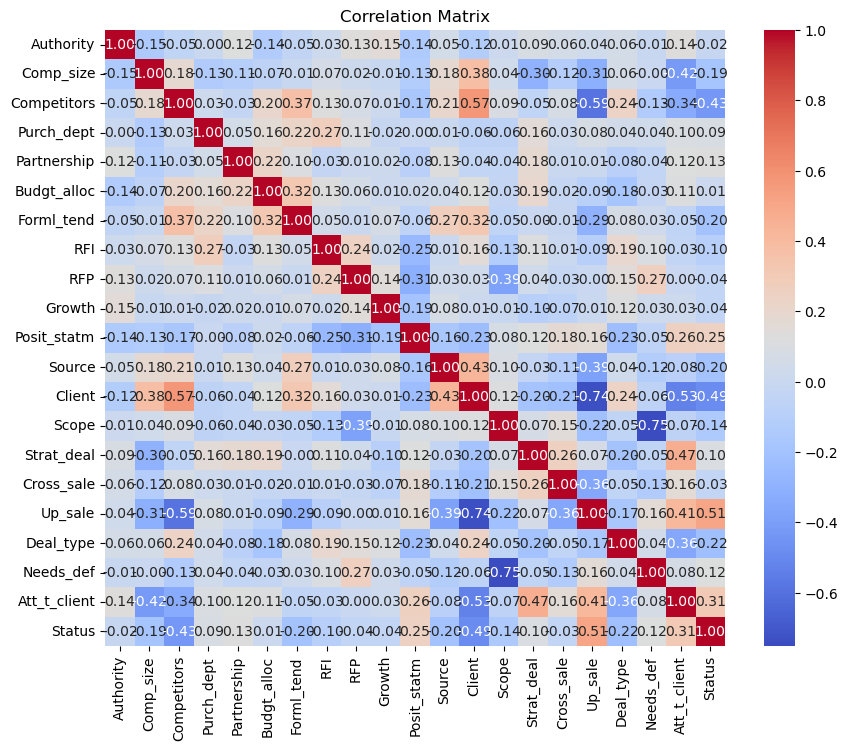

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation matrix using seaborn
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [5]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Drop the 'Product' column from the feature set
X_train = X_train.drop(columns=['Product'])
X_train = X_train.drop(columns=['Seller'])

X_test = X_test.drop(columns=['Product'])
X_test = X_test.drop(columns=['Seller'])

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

np.save('scaler_mean.npy', scaler.mean_)
np.save('scaler_scale.npy', scaler.scale_)

In [26]:
# Define the model architecture
model = Sequential([
    Dense(84, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)
model.save('opportunity_to_sales_model.keras')

Epoch 1/50
9/9 [==============================] - 0s 7ms/step - loss: 0.6539 - accuracy: 0.6573 - val_loss: 0.5739 - val_accuracy: 0.7639
Epoch 2/50
9/9 [==============================] - 0s 2ms/step - loss: 0.5785 - accuracy: 0.7517 - val_loss: 0.5131 - val_accuracy: 0.7917
Epoch 3/50
9/9 [==============================] - 0s 2ms/step - loss: 0.5376 - accuracy: 0.7483 - val_loss: 0.4997 - val_accuracy: 0.7917
Epoch 4/50
9/9 [==============================] - 0s 2ms/step - loss: 0.5162 - accuracy: 0.7762 - val_loss: 0.5064 - val_accuracy: 0.7917
Epoch 5/50
9/9 [==============================] - 0s 2ms/step - loss: 0.4993 - accuracy: 0.7762 - val_loss: 0.5016 - val_accuracy: 0.7917
Epoch 6/50
9/9 [==============================] - 0s 2ms/step - loss: 0.4854 - accuracy: 0.7867 - val_loss: 0.5172 - val_accuracy: 0.7778
Epoch 7/50
9/9 [==============================] - 0s 2ms/step - loss: 0.4735 - accuracy: 0.7902 - val_loss: 0.5178 - val_accuracy: 0.7778
Epoch 8/50
9/9 [==================

In [27]:
# Evaluate the model
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred.round())
print('Accuracy:', accuracy)



3/3 [==============================] - 0s 1ms/step
Accuracy: 0.8


## Exploratory Data Analysis (EDA)

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

### Data Overview

In [6]:
# Load the dataset
data = pd.read_csv('B2B_dataset.csv')

data.head()


,Product,Seller,Authority,Comp_size,Competitors,Purch_dept,Partnership,Budgt_alloc,Forml_tend,RFI,...,Source,Client,Scope,Strat_deal,Cross_sale,Up_sale,Deal_type,Needs_def,Att_t_client,Status
0,Product A,Seller 6,Mid,Mid,No,Unknown,No,Yes,No,Yes,...,Referral,Current,Clear,Very important,No,Yes,Project,Yes,Strategic account,Won
1,Product B,Seller 8,Mid,Big,No,Yes,No,Unknown,No,No,...,Referral,Current,Clear,Unimportant,No,Yes,Maintenance,Yes,Strategic account,Won
2,Product F,Seller 1,Mid,Big,No,No,Yes,No,No,No,...,Joint past,Current,Few questions,Average important,Yes,No,Project,Info gathering,Strategic account,Won
3,Product B,Seller 8,Mid,Big,No,Yes,No,No,No,No,...,Joint past,Current,Clear,Very important,No,Yes,Maintenance,Yes,Strategic account,Won
4,Product C,Seller 1,Mid,Small,Unknown,No,No,No,No,No,...,Unknown,New,Few questions,Average important,No,No,Project,No,Normal,Won


In [7]:
# Check the dimensions of the dataset
print("Dimensions of the dataset:", data.shape)

Dimensions of the dataset: (448, 23)


In [8]:
# Check for missing values
print("Missing values:")
print(data.isnull().sum())

Missing values:
Product         0
Seller          0
Authority       0
Comp_size       0
Competitors     0
Purch_dept      0
Partnership     0
Budgt_alloc     0
Forml_tend      0
RFI             0
RFP             0
Growth          0
Posit_statm     0
Source          0
Client          0
Scope           0
Strat_deal      0
Cross_sale      0
Up_sale         0
Deal_type       0
Needs_def       0
Att_t_client    0
Status          0
dtype: int64


### Data Visualization

### Connecting to Datasource

In [9]:
from sqlalchemy.orm import sessionmaker
from sqlalchemy.exc import IntegrityError
from models import ExecutionStatus, SalesData, B2BSalesData, Base  # Import Base from models

def create_and_insert(engine, df):
    Session = sessionmaker(bind=engine)
    session = Session()
    
    try:
        # Create tables if not exists
        Base.metadata.create_all(engine)

        # Check if script has already been executed
        if not session.query(ExecutionStatus).filter_by(script_name='InsertValuesToB2BSaleData').first():
            # Insert data
            for _, row in df.iterrows():
                saleData_entry = B2BSalesData(**row.to_dict())
                session.add(saleData_entry)

            # Update execution status to indicate that insert statement has been executed
            session.add(ExecutionStatus(script_name='InsertValuesToB2BSaleData', executed=True))

            # Commit the changes
            session.commit()
            logging.info("Insert statement executed successfully")
        else:
            logging.info("Insert statement has already been executed before")
    except IntegrityError as e:
        session.rollback()
        logging.error("Error executing insert statement:", e)
    finally:
        session.close()

In [10]:
import json
import logging
from sqlalchemy import create_engine
from datetime import datetime

# Get current date and time
current_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

# Configure logging with dynamic filename
log_filename = f"{current_time}.log"
logging.basicConfig(filename=log_filename, level=logging.INFO)

try:
    # Load connection details from the config file
    with open('config.json') as f:
        config = json.load(f)['mysql']

    # Create the database URL
    db_url = f"mysql+mysqlconnector://{config['user']}:{config['password']}@{config['host']}/{config['database']}"
    
    # Create the SQLAlchemy engine
    engine = create_engine(db_url)

    # Test the connection
    with engine.connect() as connection:
        logging.info("Connected to MySQL database successfully")
        create_and_insert(engine, data)
        
except Exception as e:
    logging.error("Failed to connect to MySQL database: %s", e)

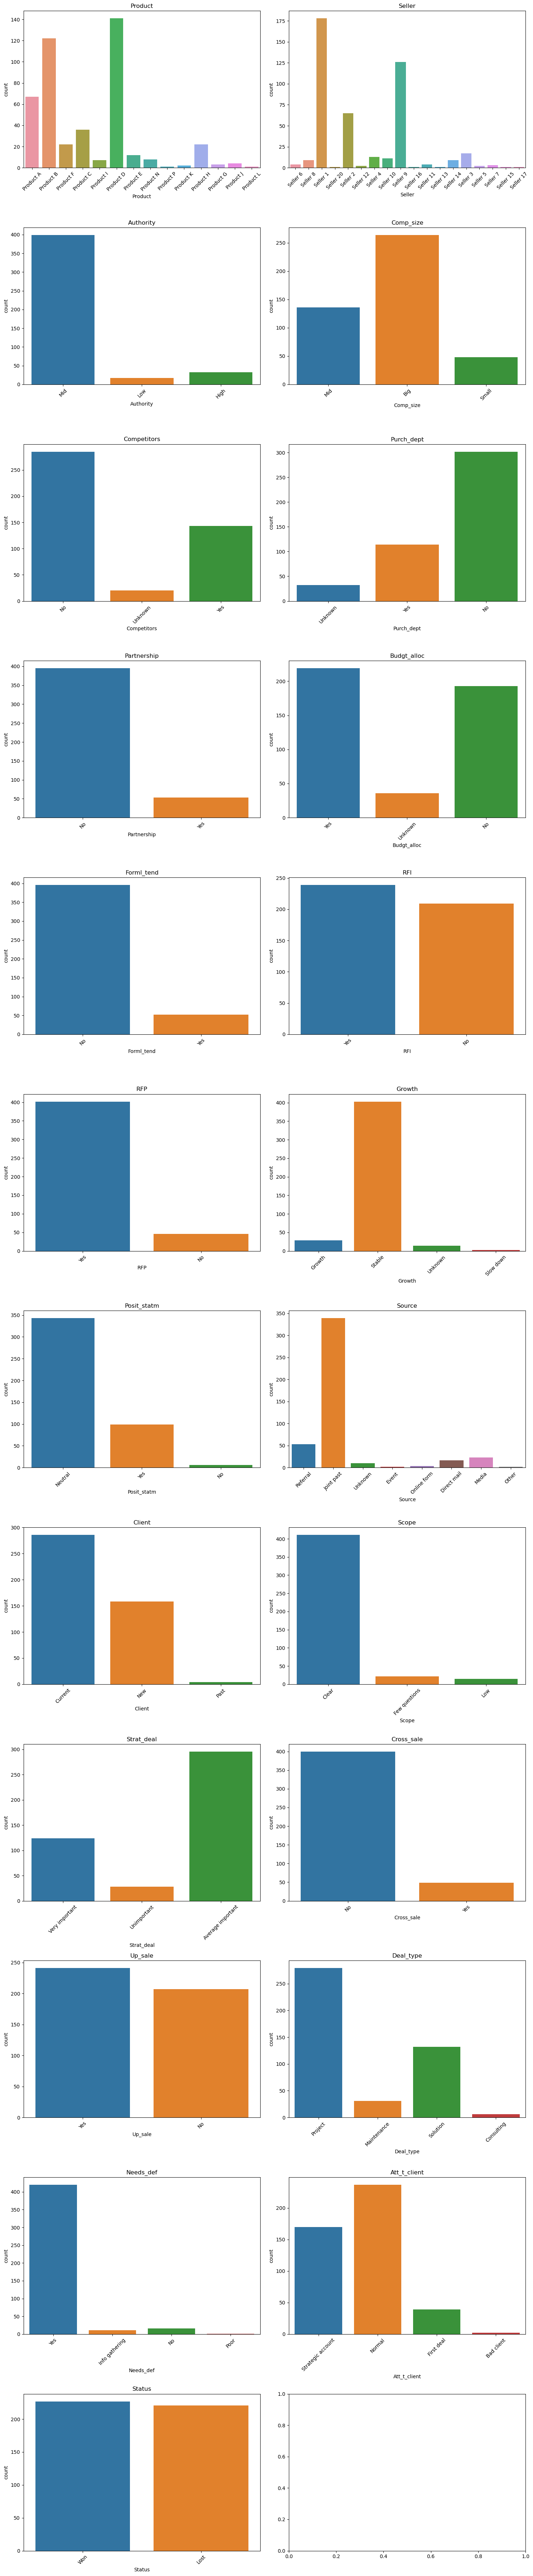

In [63]:
# Visualize the distribution of categorical features in two columns
categorical_features = data.select_dtypes(include=[object])
num_cols = len(categorical_features.columns)
num_rows = (num_cols + 1) // 2  # Calculate the number of rows needed for two columns

fig, axes = plt.subplots(num_rows, 2, figsize=(15, 6*num_rows))

for i, column in enumerate(categorical_features.columns):
    row = i // 2
    col = i % 2
    sns.countplot(x=column, data=data, ax=axes[row, col])
    axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45)  # Rotate x-axis labels
    axes[row, col].set_title(column)

# Adjust layout
plt.tight_layout()
plt.show()


### Correlation

In [49]:
# Calculate the correlation matrix for the subset of data
correlation_matrix = data_subset.corr()

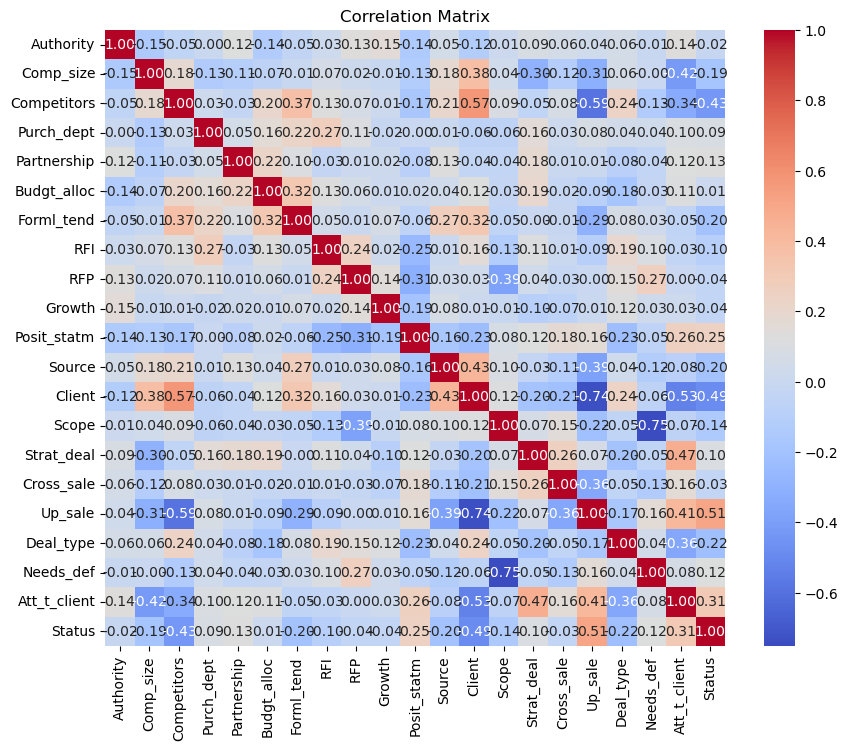

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation matrix using seaborn
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


### Connect to Grafana Dashboard

In [12]:
import webbrowser

def launch_grafana_dashboard(dashboard_url):
    webbrowser.open(dashboard_url)

if __name__ == "__main__":
    
    # Load from Json
    
    # Load connection details from the config file
    with open('config.json') as f:
        grafana_config = json.load(f)['grafana']
        
    
    dashboard_url = f"{grafana_config['url']}/{grafana_config['dashboard_id']}/{grafana_config['dashboard_slug']}?orgId={grafana_config['org_id']}"
    launch_grafana_dashboard(dashboard_url)


## Preprocessing Step

### Remove unnecessary columns

In [43]:
data = data.drop(columns=['Product'])
data = data.drop(columns=['Seller'])

### Encoding Categorical Variables

In [44]:
# Convert categorical columns to categorical data type
categorical_columns = ['Authority', 'Comp_size', 'Competitors', 'Purch_dept', 'Partnership', 
                       'Budgt_alloc', 'Forml_tend', 'RFI', 'RFP', 'Growth', 'Posit_statm', 
                       'Client', 'Scope', 'Strat_deal', 'Cross_sale', 'Deal_type', 'Needs_def', 
                       'Att_t_client', 'Status', 'Source', 'Up_sale']

for col in categorical_columns:
    data[col] = data[col].astype('category')

# Convert categorical values to numerical labels using LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])


### Splitting the Dataset

In [45]:
# Separate features (X) and target variable (y)
X = data.drop(columns=['Status'])  # Features
y = data['Status']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Scaling

In [46]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

np.save('scaler_mean.npy', scaler.mean_)
np.save('scaler_scale.npy', scaler.scale_)

### Predicition Model

In [47]:
# Define the model architecture
model = Sequential([
    Dense(84, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)
model.save('opportunity_to_sales_model.keras')

Epoch 1/50
9/9 [==============================] - 0s 8ms/step - loss: 0.6821 - accuracy: 0.5420 - val_loss: 0.6415 - val_accuracy: 0.6806
Epoch 2/50
9/9 [==============================] - 0s 2ms/step - loss: 0.6039 - accuracy: 0.6993 - val_loss: 0.5800 - val_accuracy: 0.7639
Epoch 3/50
9/9 [==============================] - 0s 2ms/step - loss: 0.5489 - accuracy: 0.7483 - val_loss: 0.5412 - val_accuracy: 0.7778
Epoch 4/50
9/9 [==============================] - 0s 3ms/step - loss: 0.5198 - accuracy: 0.7552 - val_loss: 0.5268 - val_accuracy: 0.7639
Epoch 5/50
9/9 [==============================] - 0s 2ms/step - loss: 0.4972 - accuracy: 0.7692 - val_loss: 0.5053 - val_accuracy: 0.7500
Epoch 6/50
9/9 [==============================] - 0s 2ms/step - loss: 0.4838 - accuracy: 0.7657 - val_loss: 0.4984 - val_accuracy: 0.7500
Epoch 7/50
9/9 [==============================] - 0s 3ms/step - loss: 0.4689 - accuracy: 0.7692 - val_loss: 0.5074 - val_accuracy: 0.7361
Epoch 8/50
9/9 [==================

### Model Evaluation

In [48]:
# Evaluate the model
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred.round())
print('Accuracy:', accuracy)


3/3 [==============================] - 0s 869us/step
Accuracy: 0.7555555555555555
